# Distribution by RSI - Analytics

### Import Library

In [30]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 9]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [31]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [32]:
data = dataset.copy()

In [33]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2025-02-14 14:15:00,1343.0,1343.0,1340.3,1341.3,7141
2025-02-14 14:20:00,1340.9,1341.9,1340.5,1341.4,4593
2025-02-14 14:25:00,1341.1,1342.5,1340.7,1342.5,4207


In [34]:
data['RSI'] = ta.rsi(data["Close"], length=14)
data['RSI'] = round(data['RSI'])
data['RSI_shift'] = data['RSI'].shift(1)

In [35]:
back_bar = 20
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(back_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()

In [36]:
data.dropna(inplace=True)
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)

In [37]:
## Analytics Key levels & RSI relationship

In [38]:
keylevels_data = data[(data.is_r_keylevel == True) | (data.is_s_keylevel == True)]

<Axes: xlabel='RSI'>

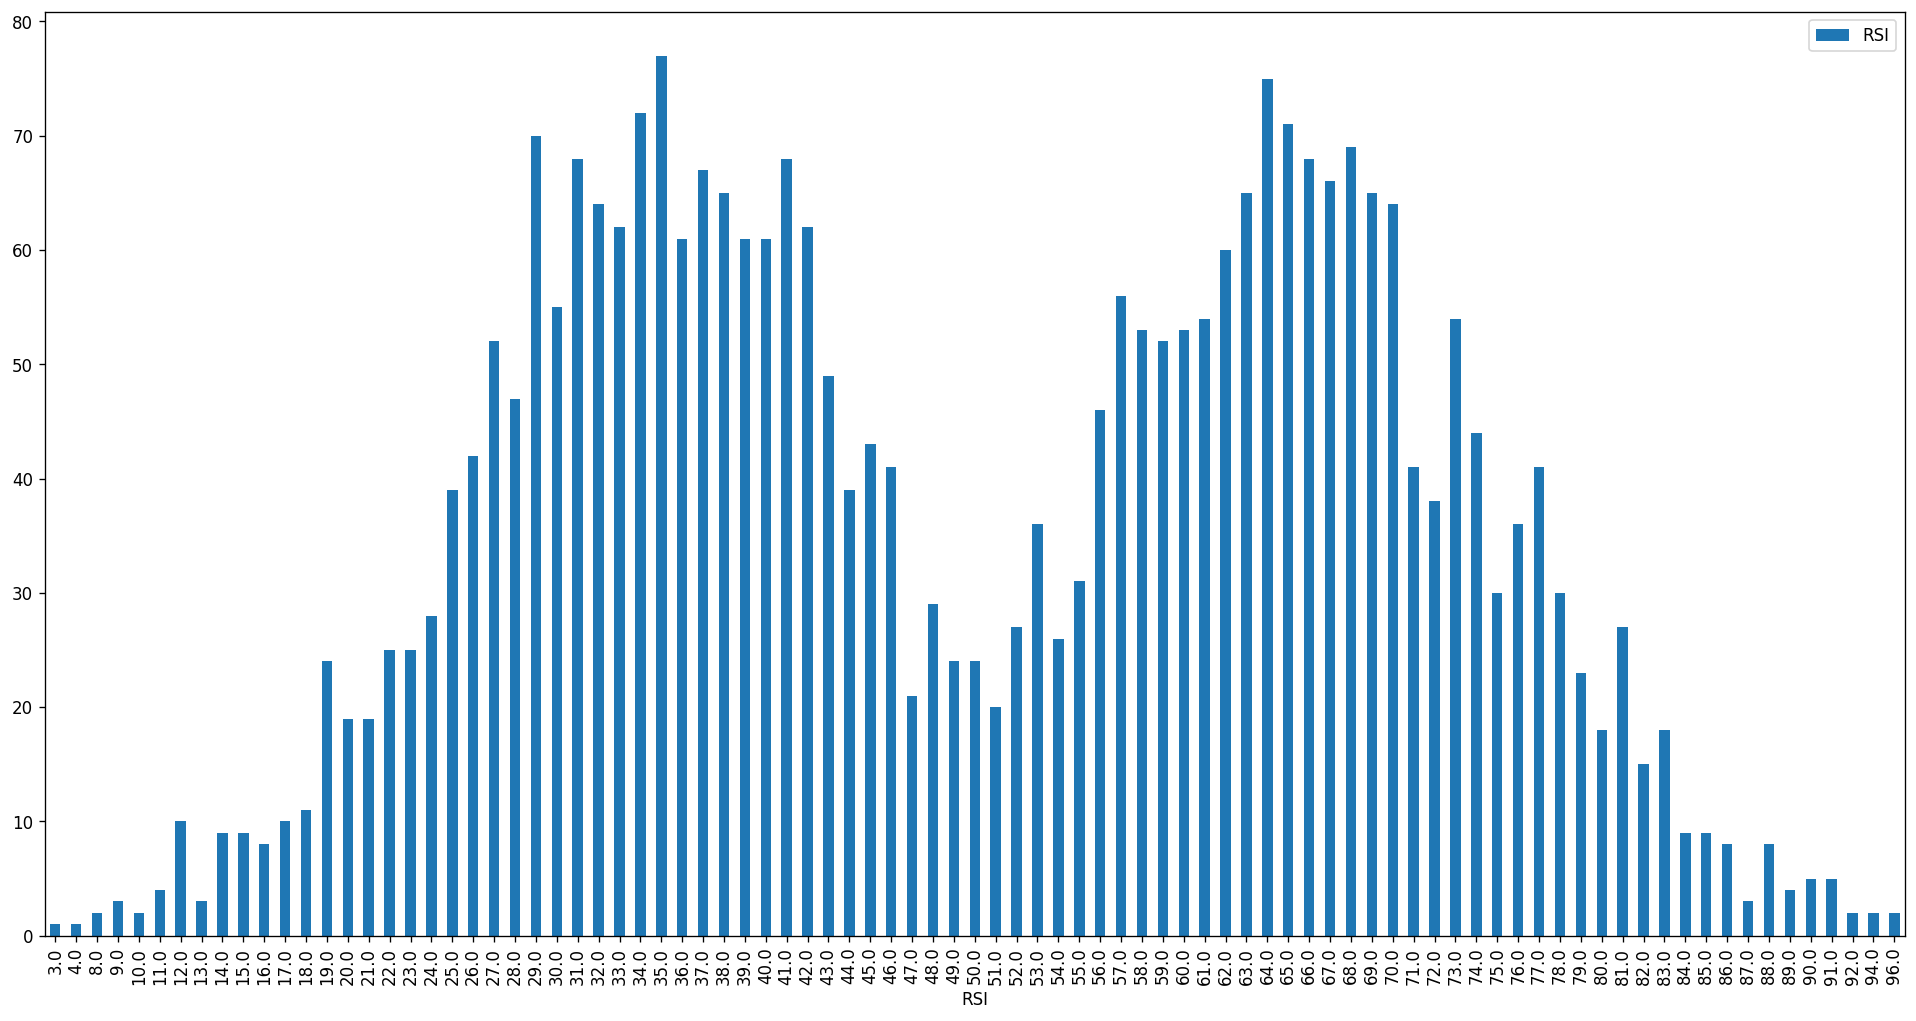

In [39]:
keylevels_data_grouped_by_rsi = keylevels_data.groupby(['RSI'])[['RSI']].count()
keylevels_data_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

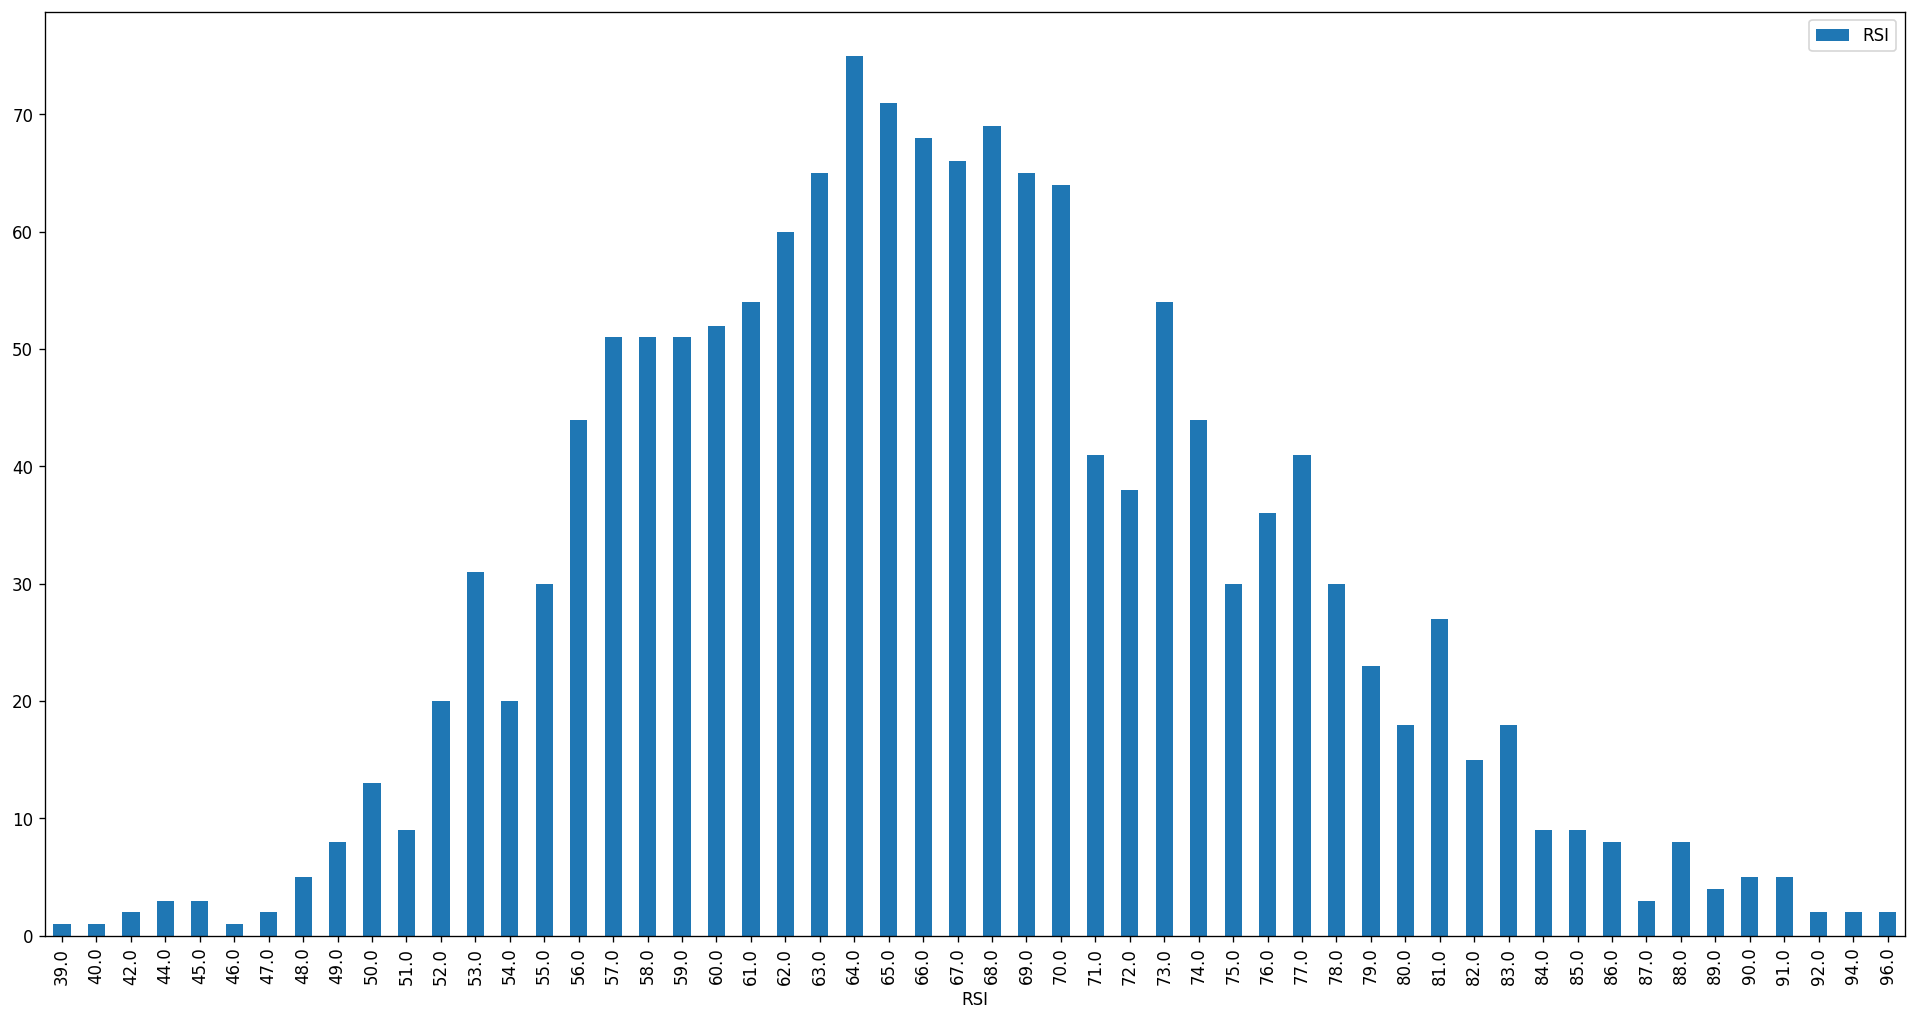

In [40]:
rkeylevels_data_grouped_by_rsi = data[data.is_r_keylevel == True].groupby(['RSI'])[['RSI']].count()
rkeylevels_data_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

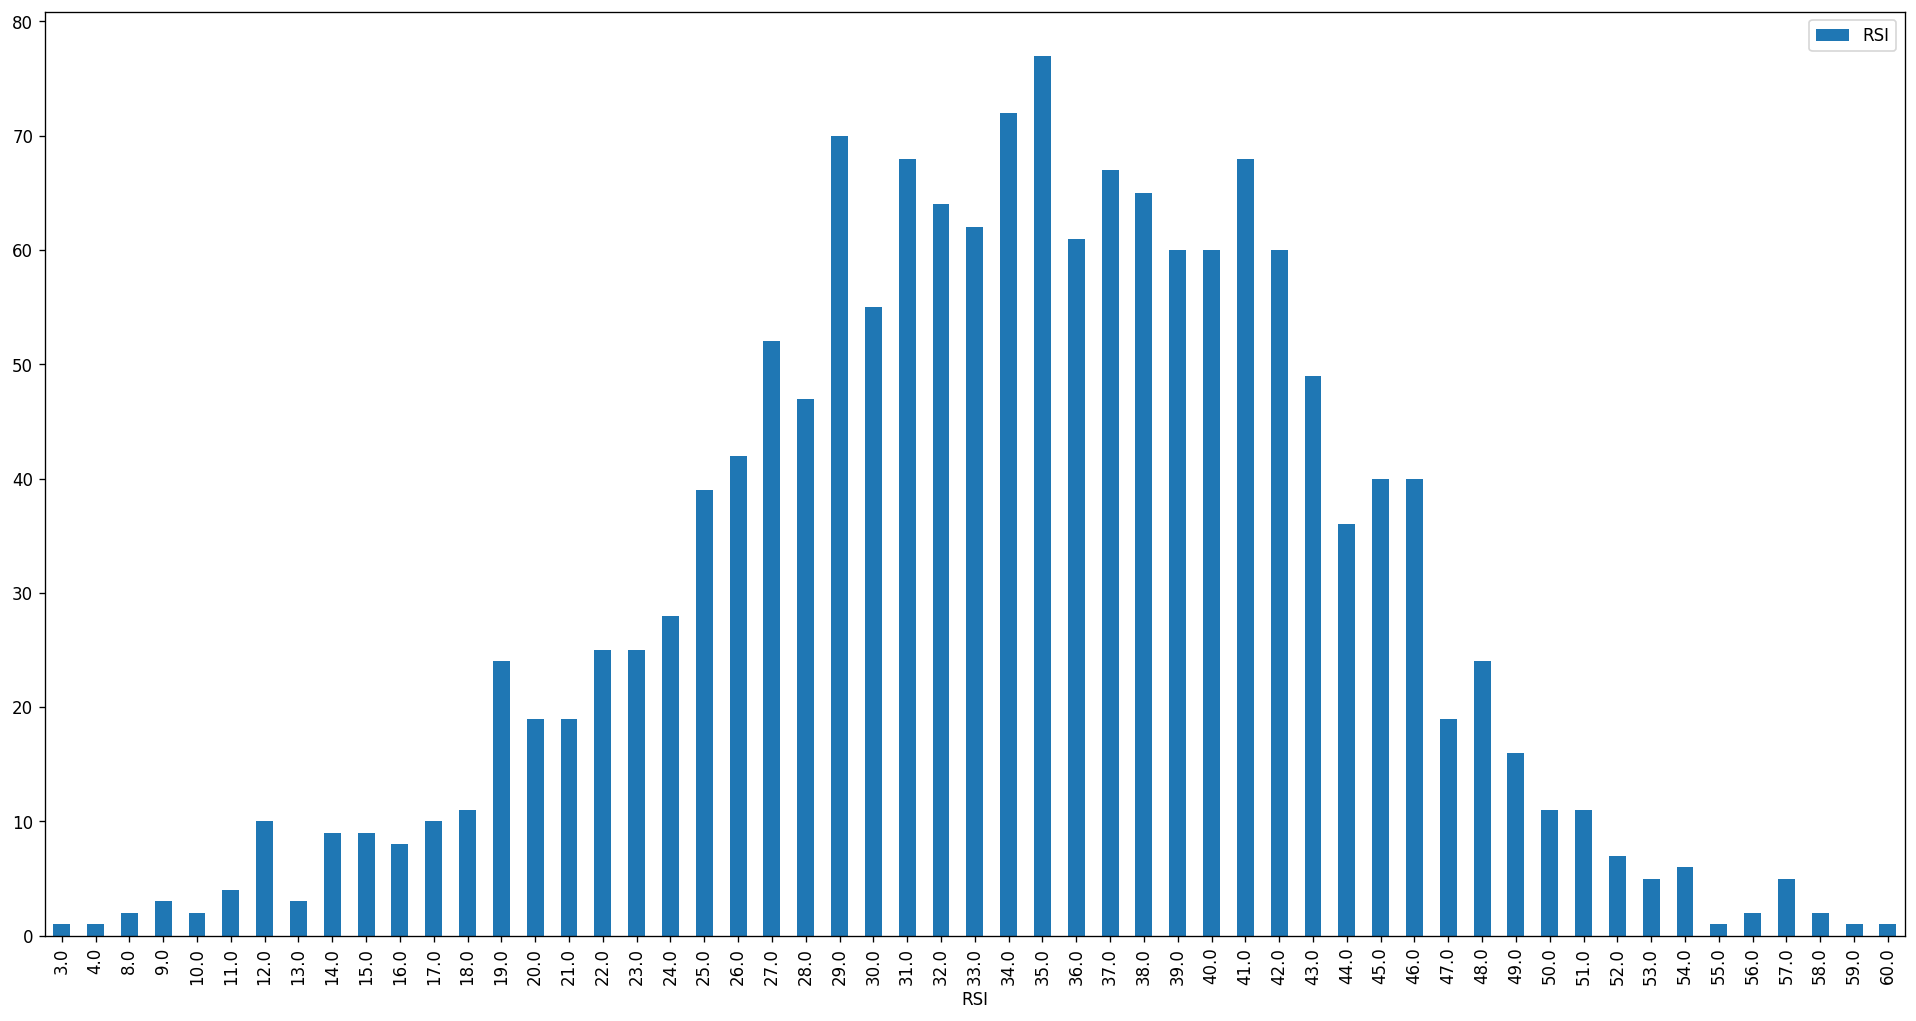

In [41]:
skeylevels_data_grouped_by_rsi = data[data.is_s_keylevel == True].groupby(['RSI'])[['RSI']].count()
skeylevels_data_grouped_by_rsi.plot.bar()

In [42]:
top_data = data[data['is_r_keylevel'] == True]
bot_data = data[data['is_s_keylevel'] == True]
rac_data = data[(data['is_r_keylevel'] != True) & (data['is_s_keylevel'] != True)]

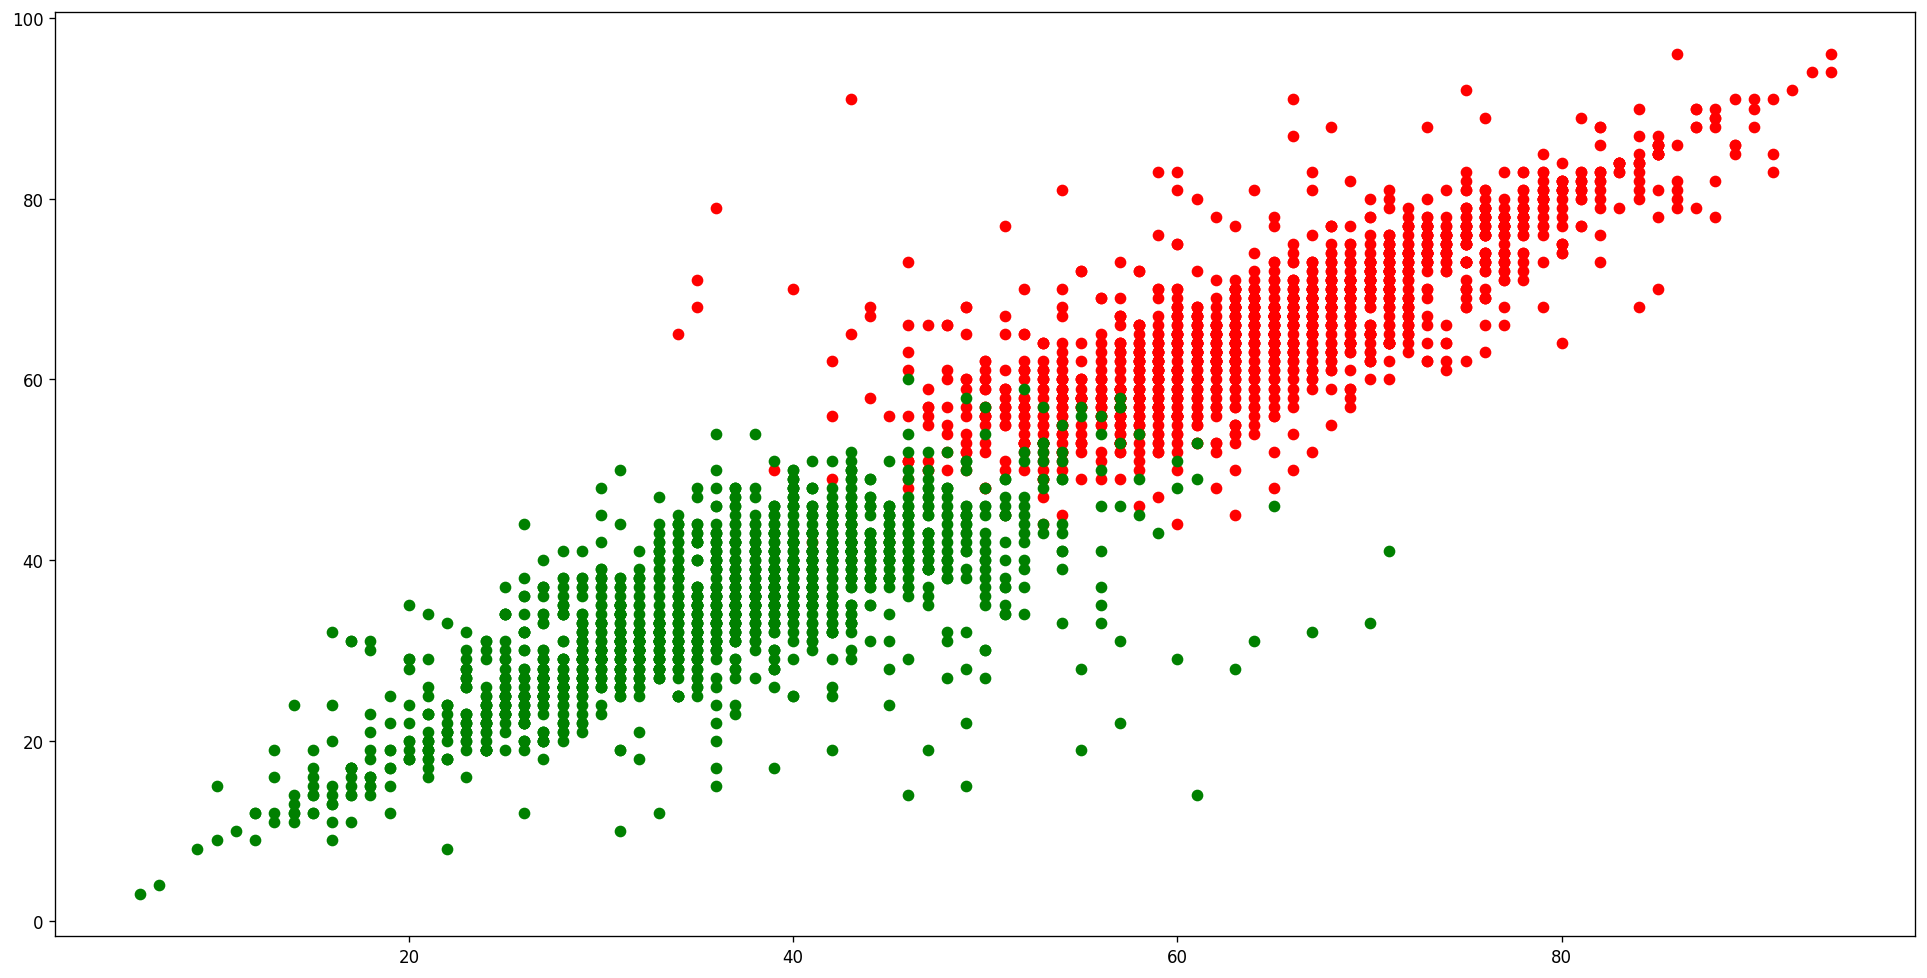

In [45]:
plt.scatter(top_data['RSI_shift'], top_data['RSI'], c='red')
plt.scatter(bot_data['RSI_shift'], bot_data['RSI'], c='green')

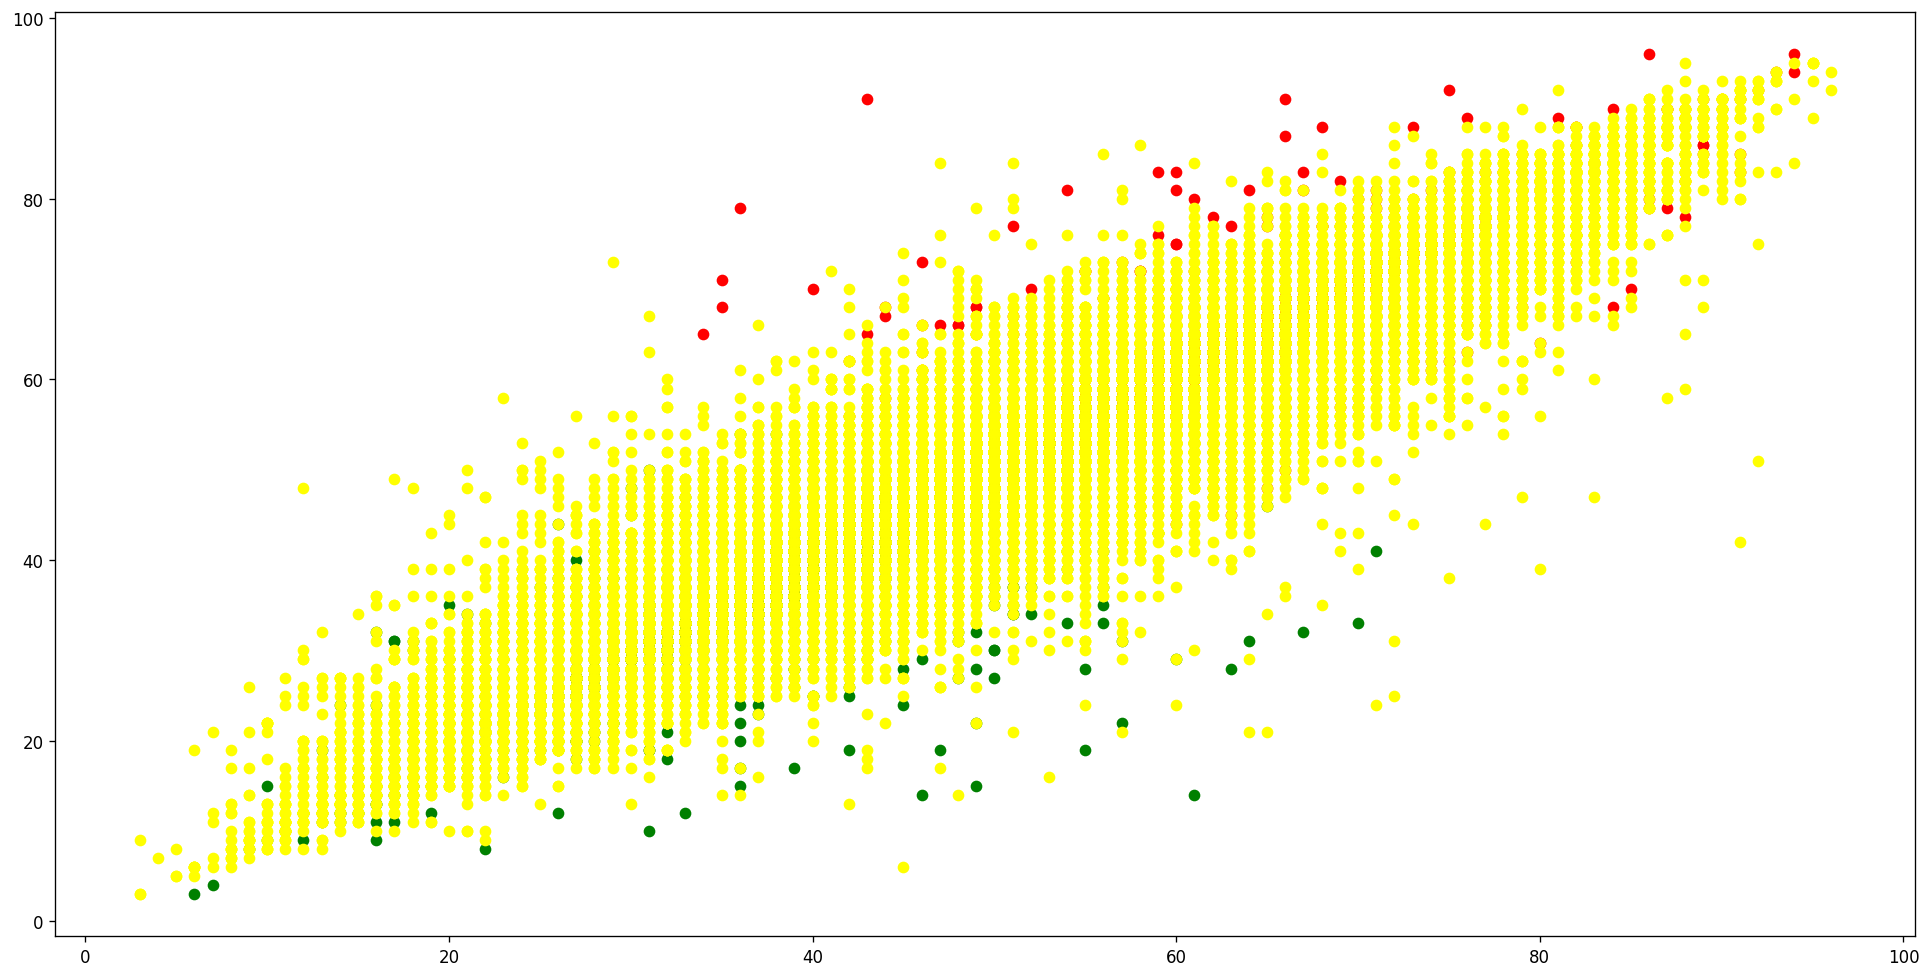

In [46]:
plt.scatter(top_data['RSI_shift'], top_data['RSI'], c='red')
plt.scatter(bot_data['RSI_shift'], bot_data['RSI'], c='green')
plt.scatter(rac_data['RSI_shift'], rac_data['RSI'], c='yellow')